## Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Loading DataSet


In [4]:
data=pd.read_csv('advertising.csv')
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


## Data Inspection

In [7]:
data.shape

(200, 4)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Data Cleaning

In [14]:
# Checking Null values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

###### Hence, the Data is clean

###### Outlier Analysis

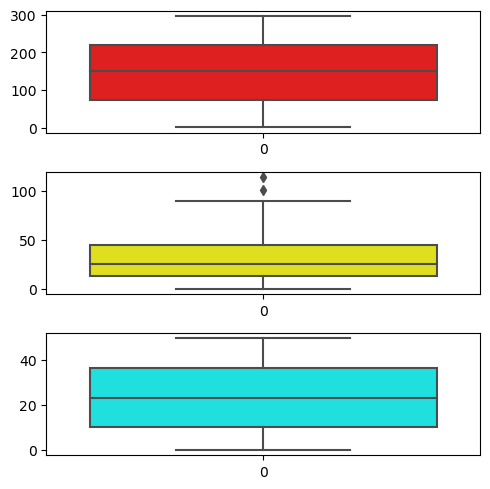

In [21]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0],color="red")
plt2 = sns.boxplot(data['Newspaper'], ax = axs[1],color="yellow")
plt3 = sns.boxplot(data['Radio'], ax = axs[2],color="cyan")
plt.tight_layout()

## Exploratory Data Analysis

##### Creating Scatterplots to Check the Linearity

##### ----> Scatterplot between TV vs Sales, Newspaper vs Sales and Radio vs Sales

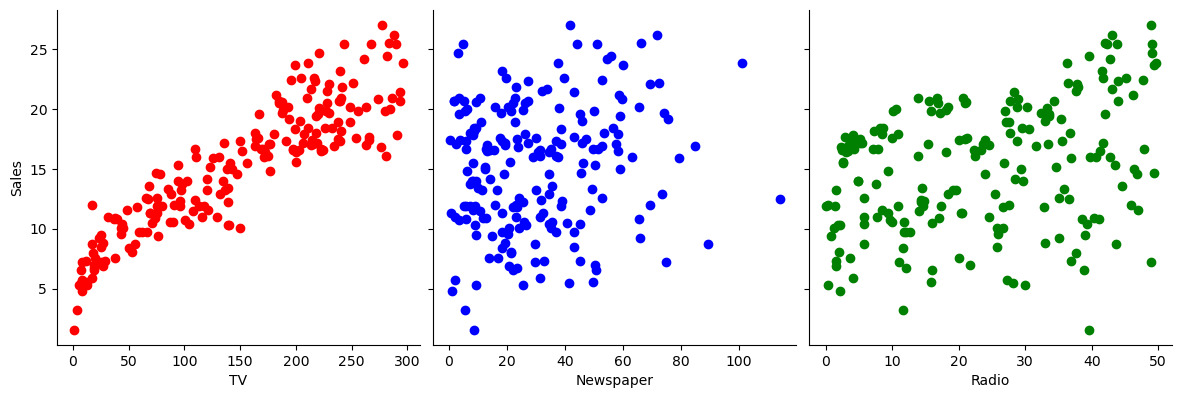

In [33]:
pairplot = sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
pairplot.axes[0, 0].scatter(data['TV'], data['Sales'], color='red', label='TV')
pairplot.axes[0, 1].scatter(data['Newspaper'], data['Sales'], color='blue', label='Newspaper')
pairplot.axes[0, 2].scatter(data['Radio'], data['Sales'], color='green', label='Radio')
plt.show()

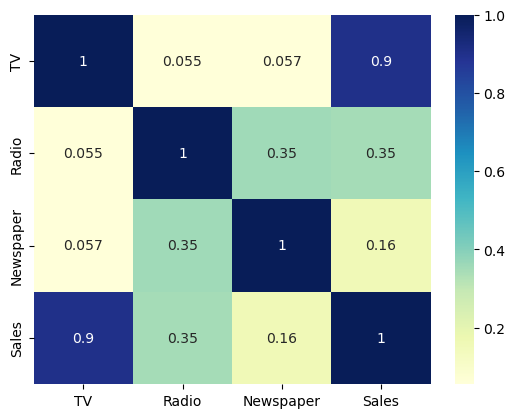

In [27]:
# Let's see the correlation between different variables.
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

###### Model Building

Assigning  the feature variable, TV, in this case, to the variable X and the response variable, Sales, to the variable y.

In [35]:
X = data['TV']
y = data['Sales']

###### Train-Test Split

Spliting our variable into training and testing sets by importing train_test_split from the sklearn.model_selection library.

 
70% of the data in train dataset and the rest 30% in test dataset

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [39]:
#look of train dataset
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [40]:
#look of train dataset
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

###### Building a Linear Model

###### Importing necessary library


In [41]:
import statsmodels.api as sm

In [42]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [43]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [44]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           1.52e-52
Time:                        16:40:41   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

The Summary is:➳

✦The coefficient for TV is 0.054, with a very low p value

The coefficient is statistically significant. So the association is not purely by chance.

✦squared is 0.816

Meaning that 81.6% of the variance in Sales is explained by TV

This is a decent R-squared value.

✦ F statistic has a very low p value (practically low)

Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

######  linear regression equation : 
###### Sales=6.948+0.054×TV

C:\Users\syedk\AppData\Local\Temp\ipykernel_14184\2876455114.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(X_train, 6.948 + 0.054*X_train, 'r', label='Regression Line', linewidth=2, color='black')


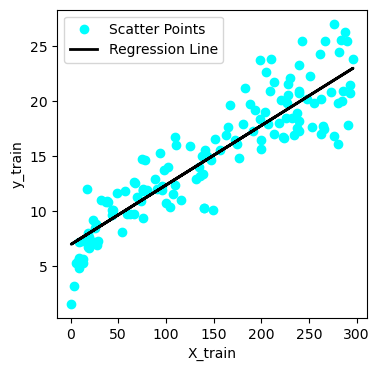

In [79]:
fig = plt.figure(figsize=(4,4))
plt.scatter(X_train, y_train, color='cyan', label='Scatter Points')
plt.plot(X_train, 6.948 + 0.054*X_train, 'r', label='Regression Line', linewidth=2, color='black')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend()
plt.show()

#### Model Evaluation

###### Distribution of the error terms

In [56]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

C:\Users\syedk\AppData\Local\Temp\ipykernel_14184\79161071.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15,color='red')


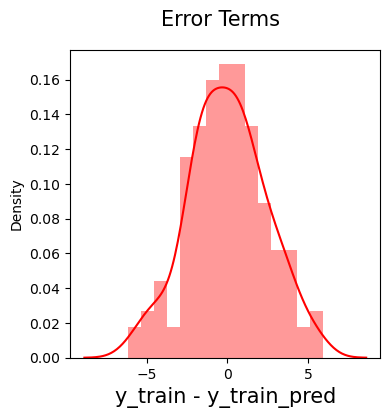

In [63]:
fig = plt.figure(figsize=(4,4))
sns.distplot(res, bins = 15,color='red')
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

###### patterns in the residuals

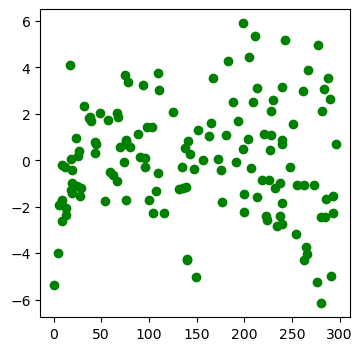

In [78]:
fig = plt.figure(figsize=(4,4))
plt.scatter(X_train,res,color='green')
plt.show()


We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

###### Predictions on the Test Set

Performing the same opertions on test data as done in train data

In [66]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [67]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [68]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [69]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.0192960089662324

###### Checking the R-squared on the test set

In [70]:
r_squared = r2_score(y_test, y_pred)
r_squared


0.7921031601245658

###### Visualizing the fit on test set

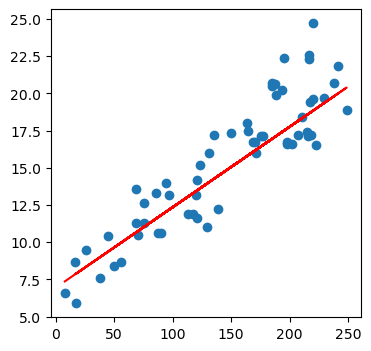

In [77]:
fig = plt.figure(figsize=(4,4))
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()